<a href="https://colab.research.google.com/github/Pavan6177/amazon-prime/blob/main/Strava_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
daily_calories = pd.read_csv("dailyCalories_merged.csv")
daily_intensities = pd.read_csv("dailyIntensities_merged.csv")
daily_steps = pd.read_csv("dailySteps_merged.csv")
heartrate = pd.read_csv("heartrate_seconds_merged.csv")
hourly_calories = pd.read_csv("hourlyCalories_merged.csv")
hourly_intensities = pd.read_csv("hourlyIntensities_merged.csv")
hourly_steps = pd.read_csv("hourlySteps_merged.csv")
weight_log = pd.read_csv("weightLogInfo_merged.csv")


In [5]:
def check_cleanliness(df, name):
    print(f"\n📄 {name}")
    print(f"Shape: {df.shape}")
    print(f"Null values:\n{df.isnull().sum()}")
    print(f"Duplicate rows: {df.duplicated().sum()}")

check_cleanliness(daily_calories, "Daily Calories")
check_cleanliness(daily_intensities, "Daily Intensities")
check_cleanliness(daily_steps, "Daily Steps")
check_cleanliness(heartrate, "Heart Rate")
check_cleanliness(hourly_calories, "Hourly Calories")
check_cleanliness(hourly_intensities, "Hourly Intensities")
check_cleanliness(hourly_steps, "Hourly Steps")
check_cleanliness(weight_log, "Weight Log")



📄 Daily Calories
Shape: (940, 3)
Null values:
Id             0
ActivityDay    0
Calories       0
dtype: int64
Duplicate rows: 0

📄 Daily Intensities
Shape: (940, 10)
Null values:
Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64
Duplicate rows: 0

📄 Daily Steps
Shape: (940, 3)
Null values:
Id             0
ActivityDay    0
StepTotal      0
dtype: int64
Duplicate rows: 0

📄 Heart Rate
Shape: (2483658, 3)
Null values:
Id       0
Time     0
Value    0
dtype: int64
Duplicate rows: 0

📄 Hourly Calories
Shape: (22099, 3)
Null values:
Id              0
ActivityHour    0
Calories        0
dtype: int64
Duplicate rows: 0

📄 Hourly Intensities
Shape: (22099, 4)
Null values:
Id                  0
ActivityHour        0
TotalIntensity      

# **daily_calories = pd.read_csv**

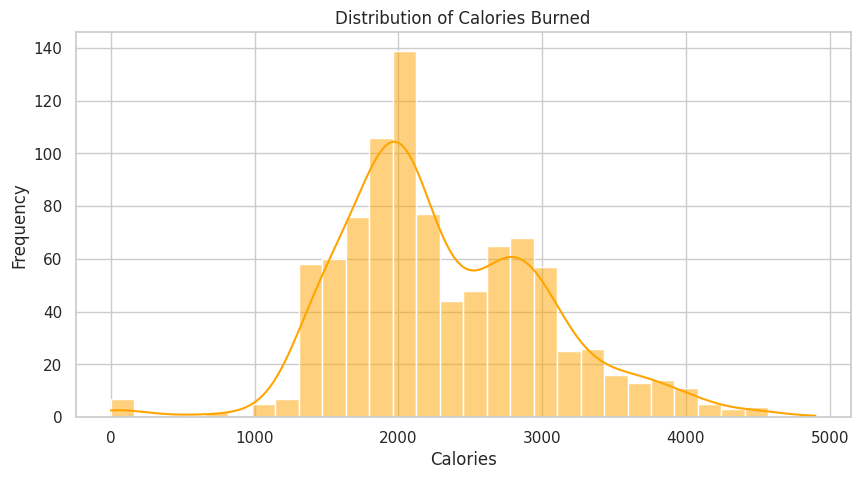

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(daily_calories['Calories'], bins=30, kde=True, color='orange')
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


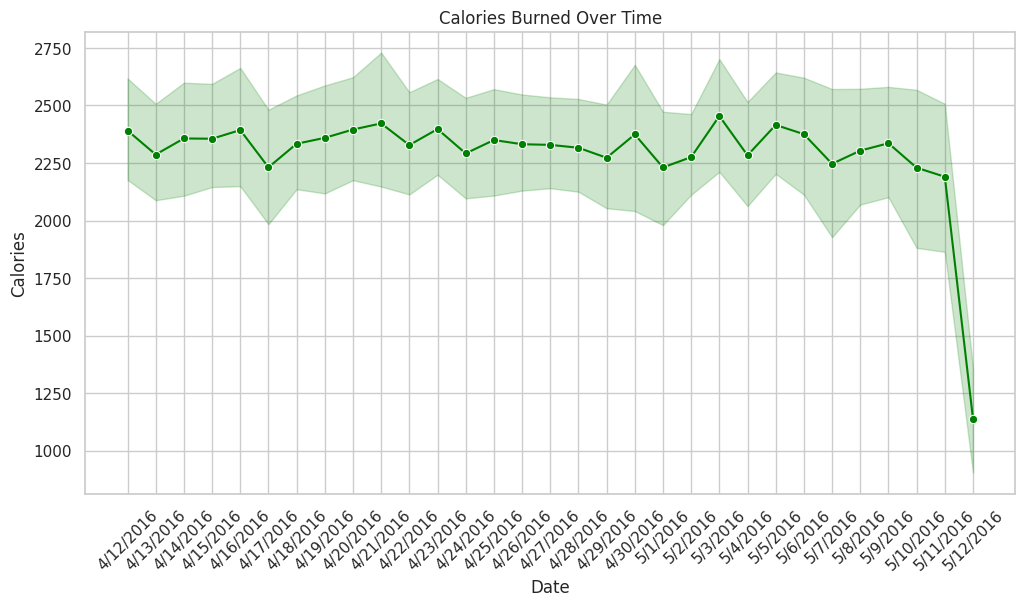

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_calories, x='ActivityDay', y='Calories', marker='o', color='green')
plt.title('Calories Burned Over Time')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-34-21777623659d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_calories.index.astype(str), y=avg_calories.values, palette='viridis')


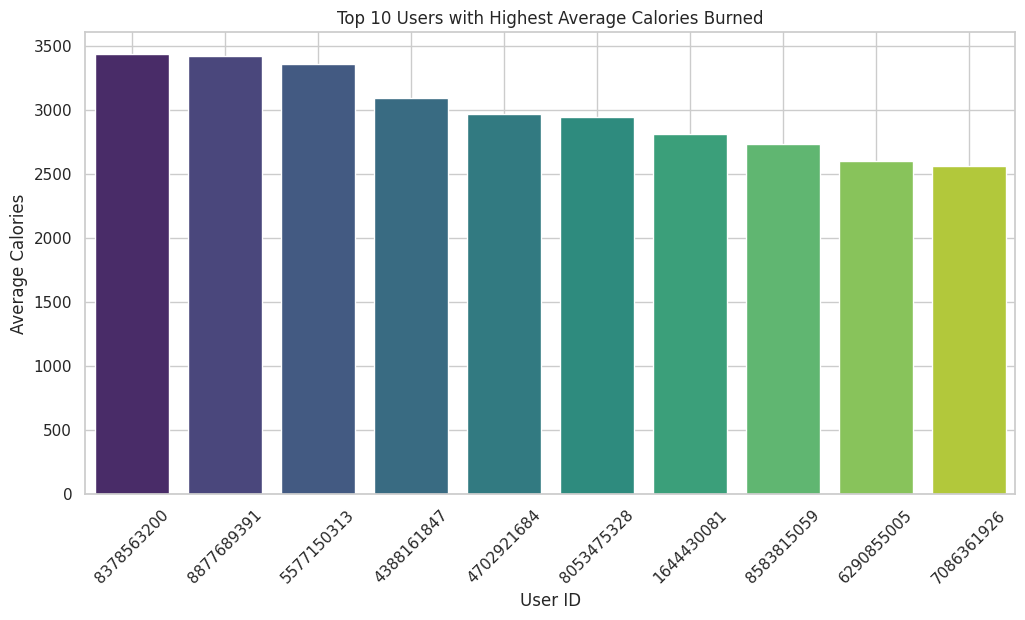

In [34]:
avg_calories = daily_calories.groupby('Id')['Calories'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_calories.index.astype(str), y=avg_calories.values, palette='viridis')
plt.title('Top 10 Users with Highest Average Calories Burned')
plt.xlabel('User ID')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


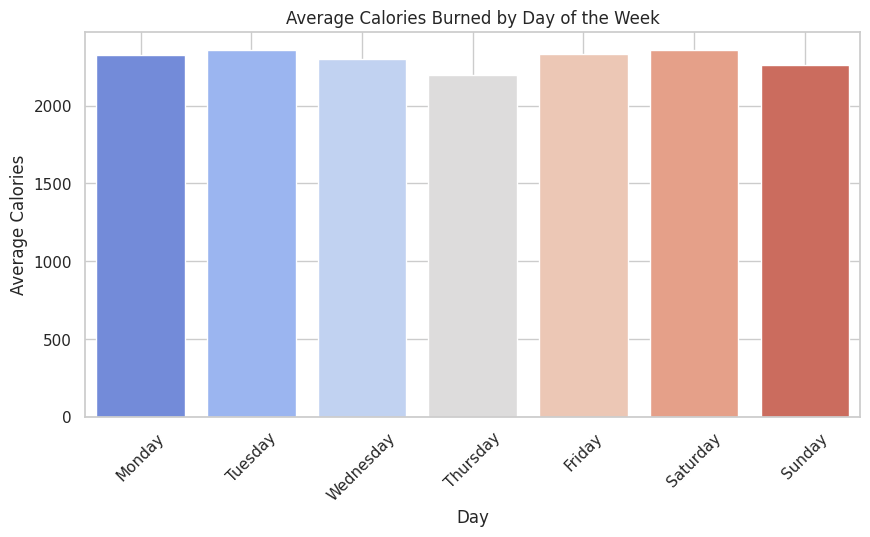

In [35]:
daily_calories['ActivityDay'] = pd.to_datetime(daily_calories['ActivityDay'])
daily_calories['DayOfWeek'] = daily_calories['ActivityDay'].dt.day_name()

# Average calories by day of week
avg_by_day = daily_calories.groupby('DayOfWeek')['Calories'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 5))
# Applying the fix for the FutureWarning: Passing `palette` without assigning `hue` is deprecated
# Also, removing 'legend=False' from sns.barplot and handling legend removal explicitly after plotting.
ax = sns.barplot(x=avg_by_day.index, y=avg_by_day.values, hue=avg_by_day.index, palette='coolwarm')
plt.title('Average Calories Burned by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)
plt.grid(True)

# **dailyIntensities_merged.csv**

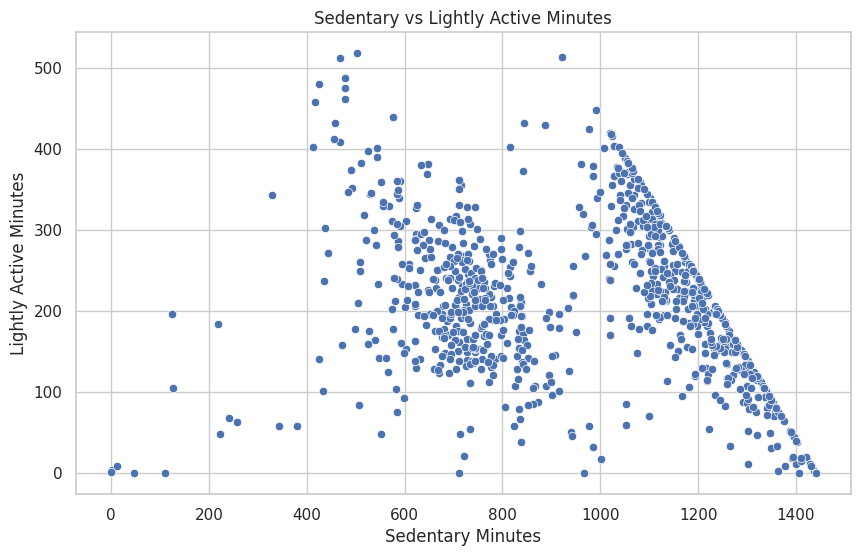

In [41]:
sns.scatterplot(data=daily_intensities, x='SedentaryMinutes', y='LightlyActiveMinutes')
plt.title('Sedentary vs Lightly Active Minutes')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Lightly Active Minutes')
plt.show()


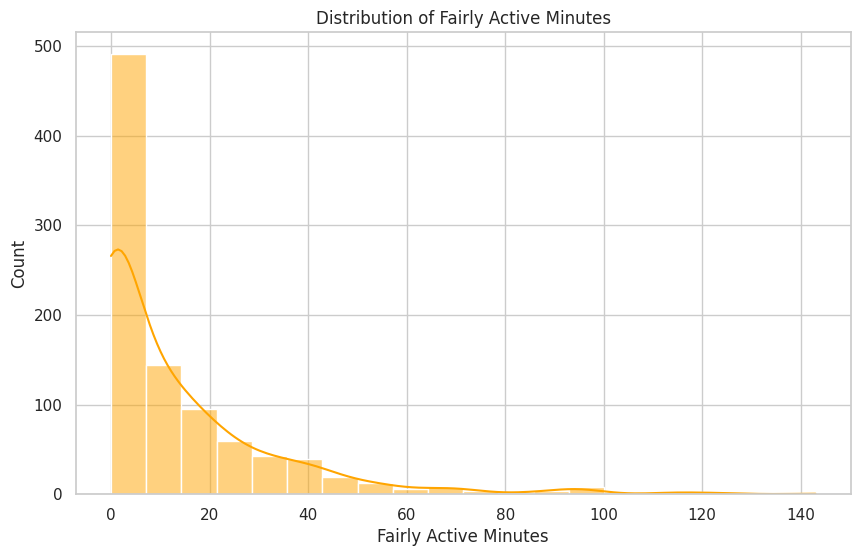

In [52]:
sns.histplot(daily_intensities['FairlyActiveMinutes'], kde=True, bins=20, color='orange')
plt.title('Distribution of Fairly Active Minutes')
plt.xlabel('Fairly Active Minutes')
plt.ylabel('Count')
plt.show()

In [58]:
print(daily_intensities.columns.tolist())

['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance', 'LightActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance']


In [59]:
print(daily_intensities.head())

             Id ActivityDay  SedentaryMinutes  LightlyActiveMinutes  \
0    1503960366   4/12/2016               728                   328   
505  4702921684   4/12/2016               718                   263   
768  8053475328   4/12/2016              1193                   123   
62   1644430081   4/12/2016              1131                   256   
536  5553957443   4/12/2016               767                   277   

     FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
0                     13                 25                      0.0   
505                    0                  0                      0.0   
768                    8                116                      0.0   
62                    51                  2                      0.0   
536                   13                 19                      0.0   

     LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance  
0                   6.06                      0.55                1

<ipython-input-69-8cace96e94f9>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=daily_intensities, x='VeryActiveMinutes', y='LightActiveDistance', palette='viridis')


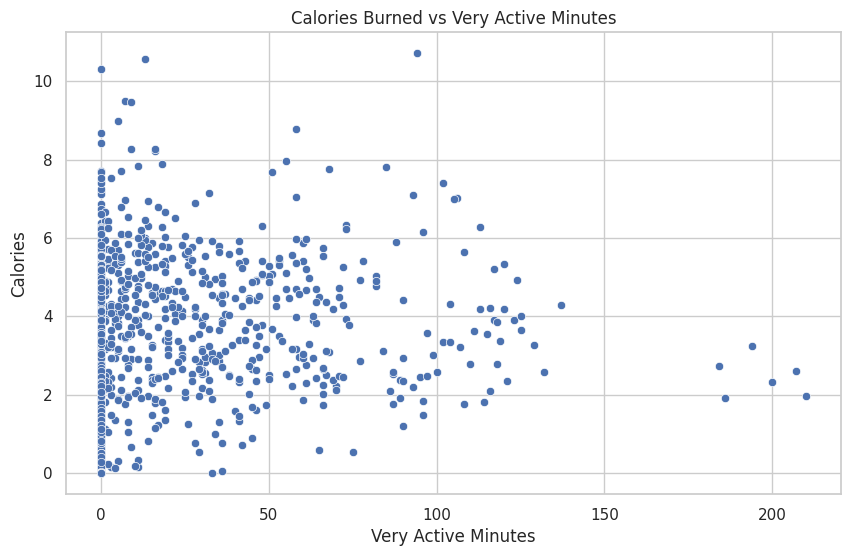

In [69]:
sns.scatterplot(data=daily_intensities, x='VeryActiveMinutes', y='LightActiveDistance', palette='viridis')
plt.title('Calories Burned vs Very Active Minutes')
plt.xlabel('Very Active Minutes')
plt.ylabel('Calories')
plt.show()

# **daily_steps = pd.read_csv**

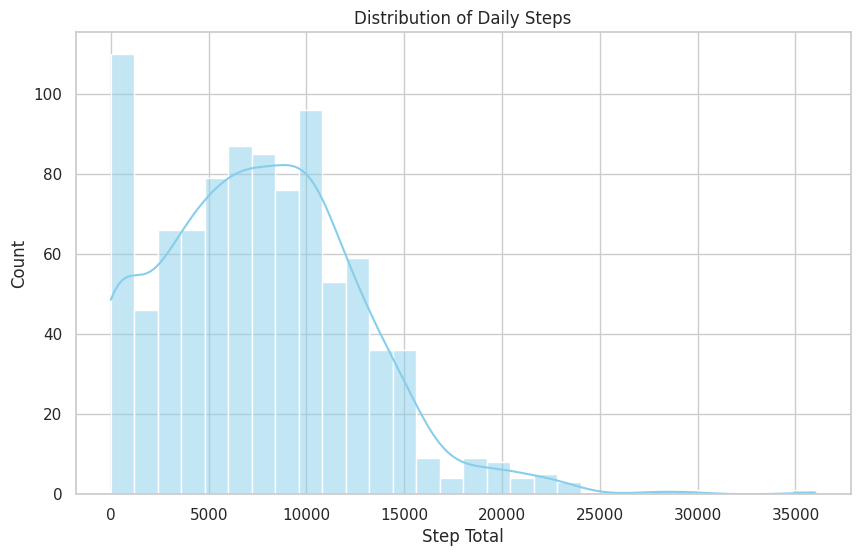

In [63]:
sns.histplot(daily_steps['StepTotal'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Daily Steps')
plt.xlabel('Step Total')
plt.ylabel('Count')
plt.show()

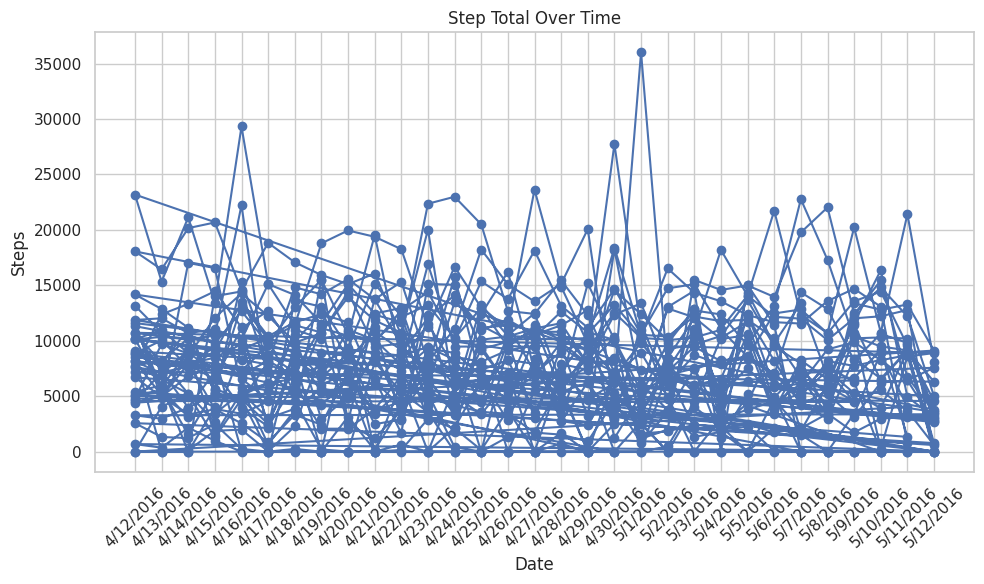

In [64]:
plt.plot(daily_steps['ActivityDay'], daily_steps['StepTotal'], marker='o')
plt.title('Step Total Over Time')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

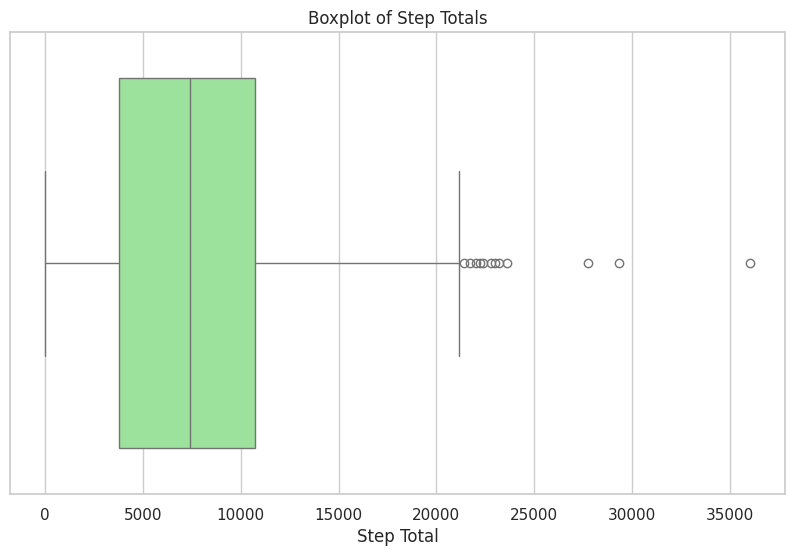

In [66]:
sns.boxplot(x=daily_steps['StepTotal'], color='lightgreen')
plt.title('Boxplot of Step Totals')
plt.xlabel('Step Total')
plt.show()

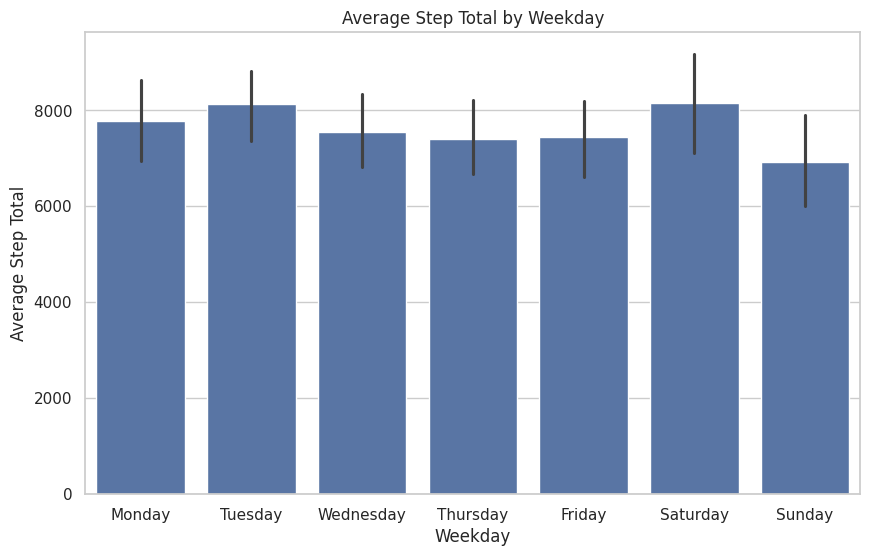

In [75]:
daily_steps['ActivityDay'] = pd.to_datetime(daily_steps['ActivityDay'])
daily_steps['Weekday'] = daily_steps['ActivityDay'].dt.day_name()

# Define the order of weekdays for plotting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_steps, x='Weekday', y='StepTotal', order=weekday_order)
plt.title('Average Step Total by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Step Total')
plt.show()

# **heartrate = pd.read_csv**

In [76]:
heartrate['Time'] = pd.to_datetime(heartrate['Time'])
heartrate['ActivityMinute'] = heartrate['Time'].dt.to_period('min')

In [77]:
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

In [78]:
hourly_calories['HourOfDay'] = hourly_calories['ActivityHour'].dt.hour
hourly_intensities['HourOfDay'] = hourly_intensities['ActivityHour'].dt.hour
hourly_steps['HourOfDay'] = hourly_steps['ActivityHour'].dt.hour

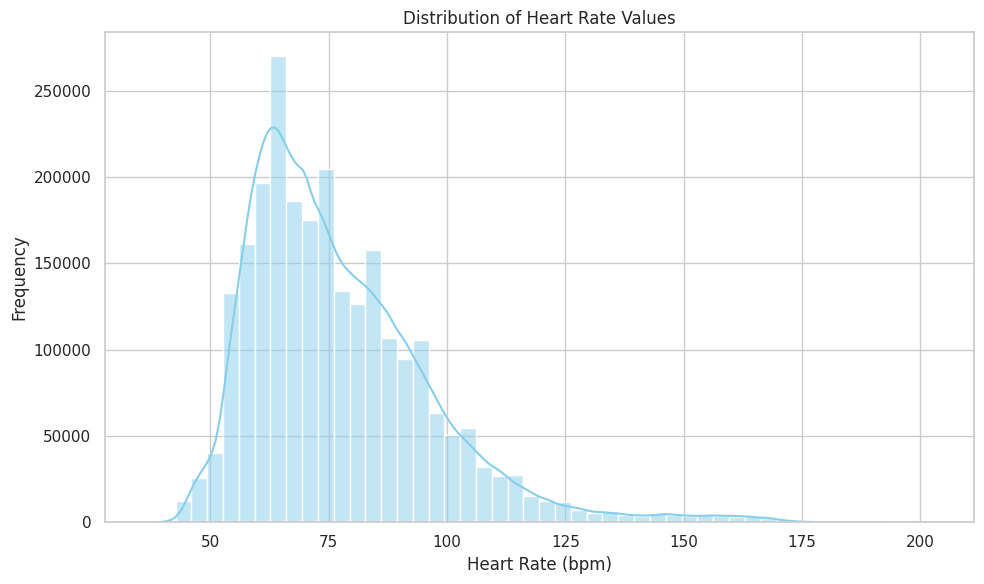

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(heartrate['Value'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Heart Rate Values')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [80]:
sample_user_id_hr = heartrate['Id'].unique()[0]
sample_heartrate_data = heartrate[heartrate['Id'] == sample_user_id_hr].sort_values(by='Time').copy()


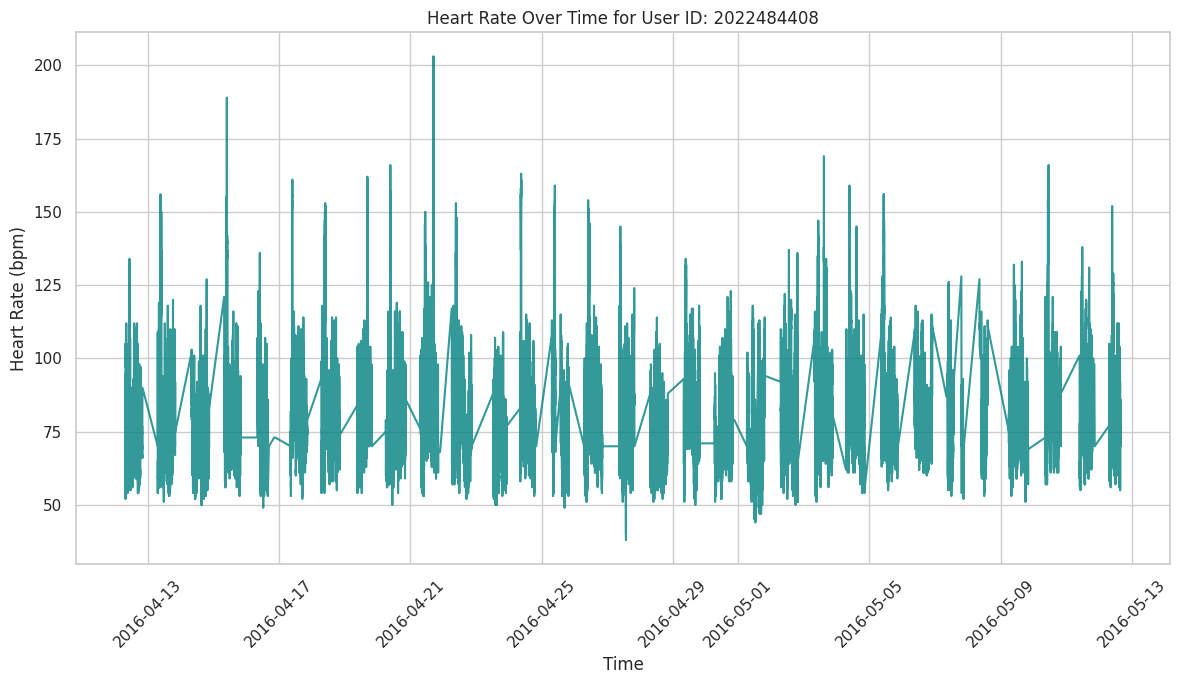

In [81]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=sample_heartrate_data, x='Time', y='Value', color='teal', alpha=0.8)
plt.title(f'Heart Rate Over Time for User ID: {sample_user_id_hr}')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
num_sample_ids = min(5, len(heartrate['Id'].unique())) # Show for up to 5 users
sample_ids_hr = heartrate['Id'].unique()[:num_sample_ids]
filtered_heartrate_for_boxplot = heartrate[heartrate['Id'].isin(sample_ids_hr)]



<ipython-input-84-f2938bc242c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_heartrate_for_boxplot, x='Id', y='Value', palette='viridis')


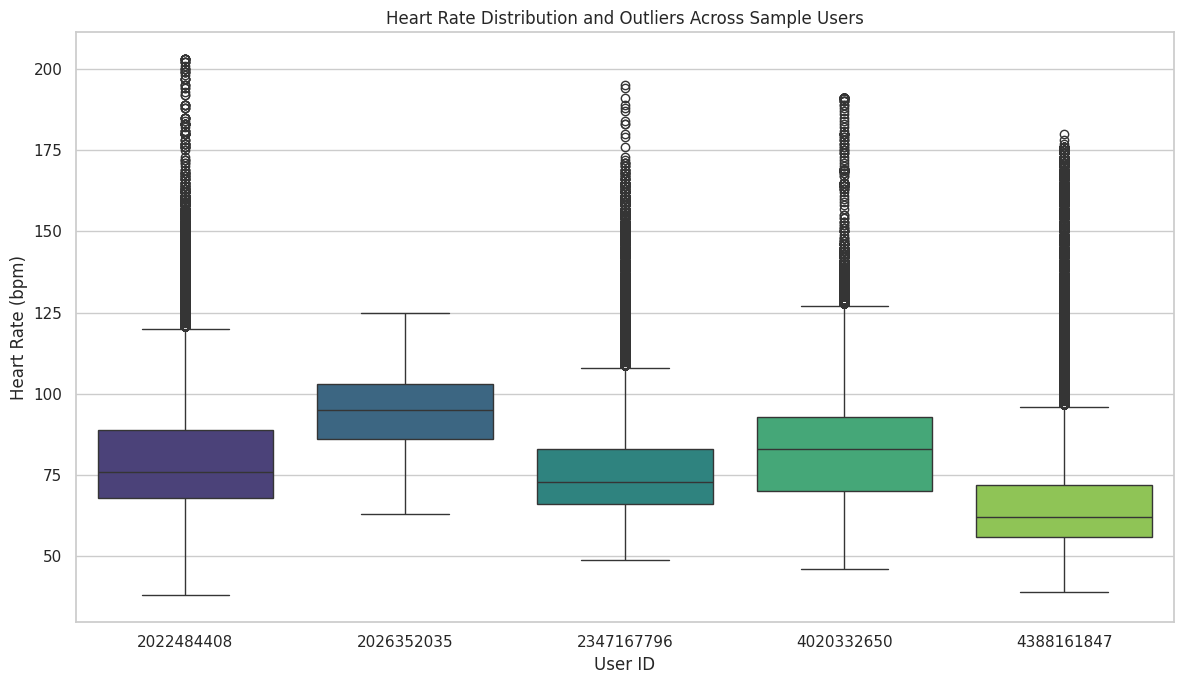

In [84]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=filtered_heartrate_for_boxplot, x='Id', y='Value', palette='viridis')
plt.title('Heart Rate Distribution and Outliers Across Sample Users')
plt.xlabel('User ID')
plt.ylabel('Heart Rate (bpm)')
plt.tight_layout()
plt.show()

# **hourly_calories = pd.read_csv**

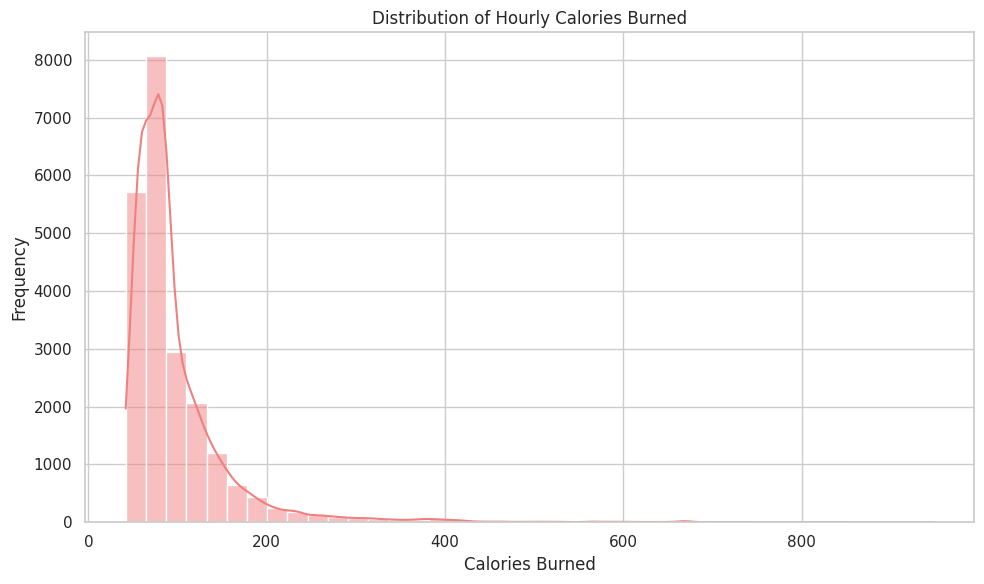

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(hourly_calories['Calories'], kde=True, bins=40, color='lightcoral')
plt.title('Distribution of Hourly Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-87-e9a415d2b3dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_calories_by_hour, x='HourOfDay', y='Calories', palette='magma')


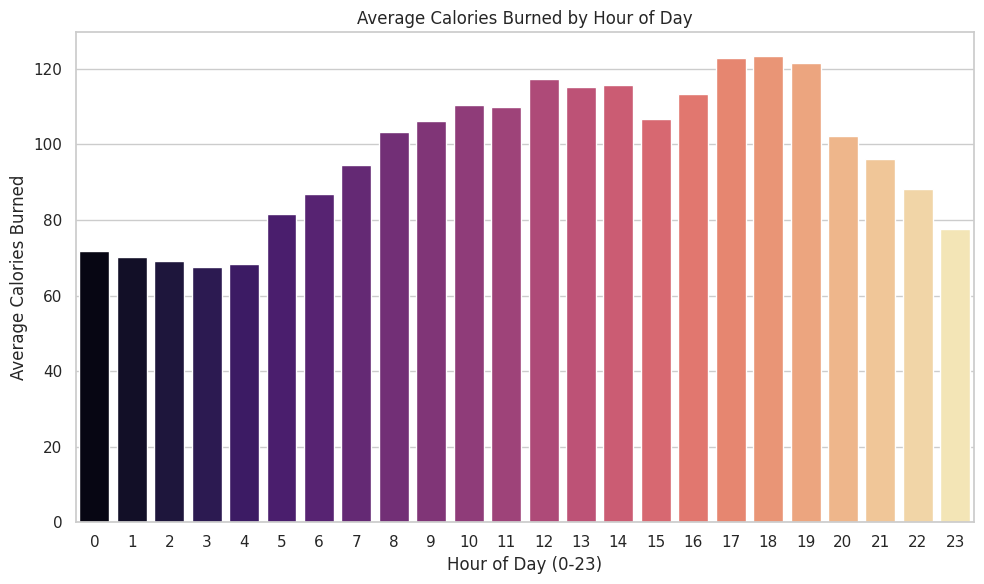

In [87]:
avg_calories_by_hour = hourly_calories.groupby('HourOfDay')['Calories'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_calories_by_hour, x='HourOfDay', y='Calories', palette='magma')
plt.title('Average Calories Burned by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Calories Burned')
plt.tight_layout()
plt.show()

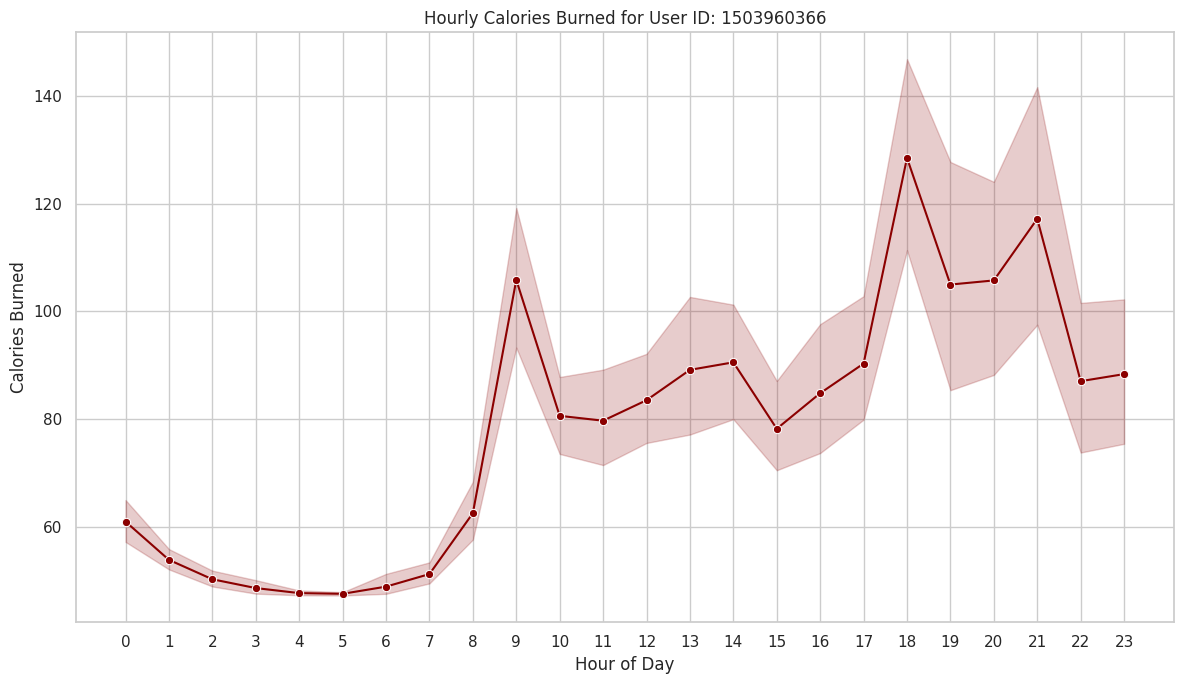

In [88]:
sample_user_id_cal = hourly_calories['Id'].unique()[0]
sample_hourly_calories_data = hourly_calories[hourly_calories['Id'] == sample_user_id_cal].sort_values(by='ActivityHour').copy()

plt.figure(figsize=(12, 7))
sns.lineplot(data=sample_hourly_calories_data, x='HourOfDay', y='Calories', marker='o', color='darkred')
plt.title(f'Hourly Calories Burned for User ID: {sample_user_id_cal}')
plt.xlabel('Hour of Day')
plt.ylabel('Calories Burned')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

# **hourly_intensities = pd.read_csv**

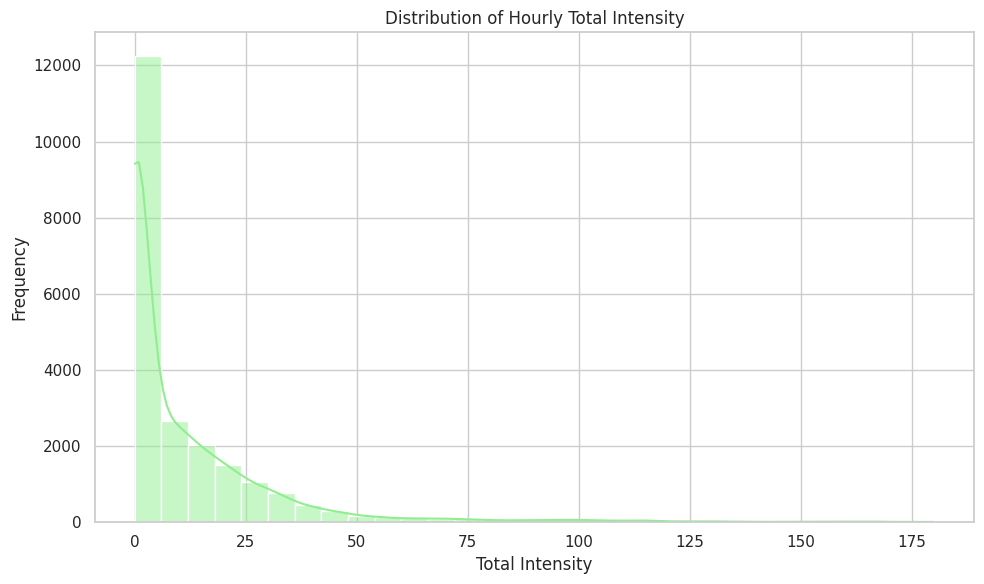

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(hourly_intensities['TotalIntensity'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Hourly Total Intensity')
plt.xlabel('Total Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

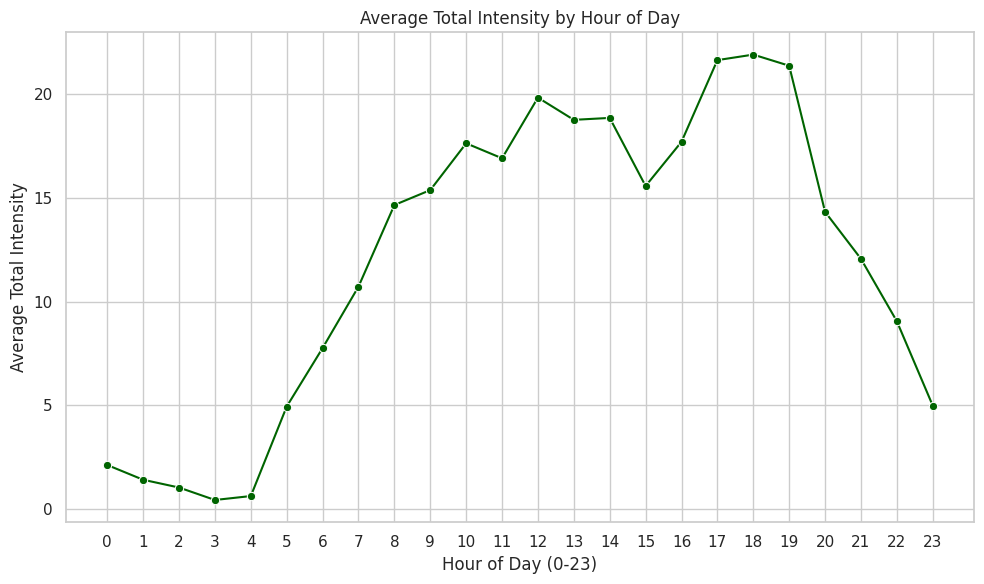

In [90]:
avg_intensity_by_hour = hourly_intensities.groupby('HourOfDay')['TotalIntensity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_intensity_by_hour, x='HourOfDay', y='TotalIntensity', marker='o', color='darkgreen')
plt.title('Average Total Intensity by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Total Intensity')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

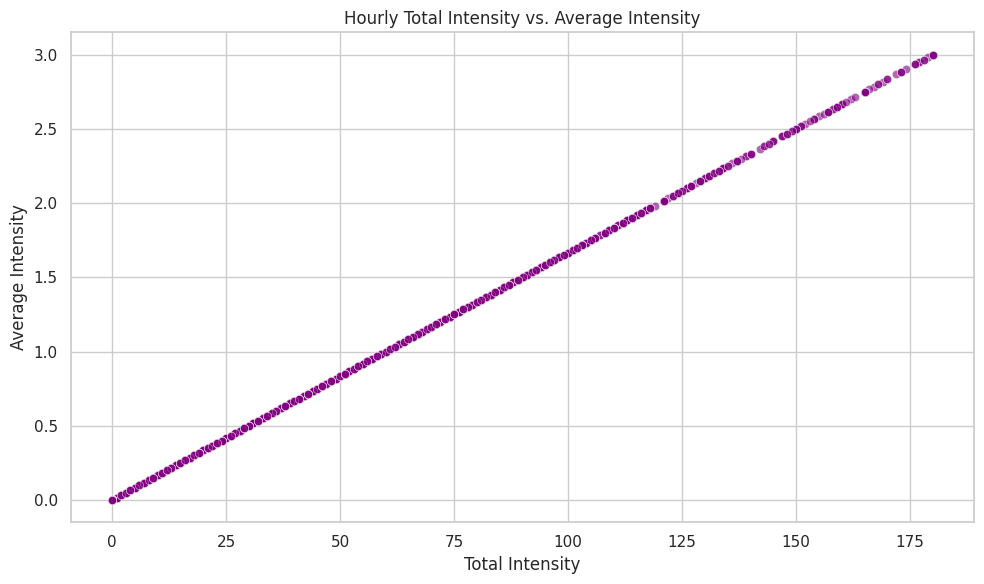

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hourly_intensities, x='TotalIntensity', y='AverageIntensity', alpha=0.6, color='purple')
plt.title('Hourly Total Intensity vs. Average Intensity')
plt.xlabel('Total Intensity')
plt.ylabel('Average Intensity')
plt.tight_layout()
plt.show()

# **hourly_steps = pd.read_csv**

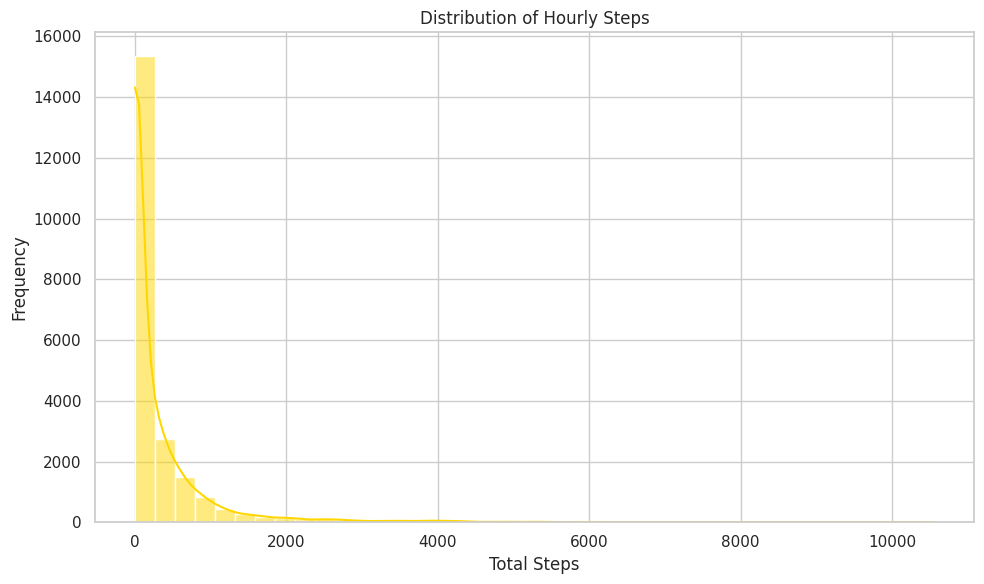

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(hourly_steps['StepTotal'], kde=True, bins=40, color='gold')
plt.title('Distribution of Hourly Steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-93-7114df668b2e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_steps_by_hour, x='HourOfDay', y='StepTotal', palette='cividis')


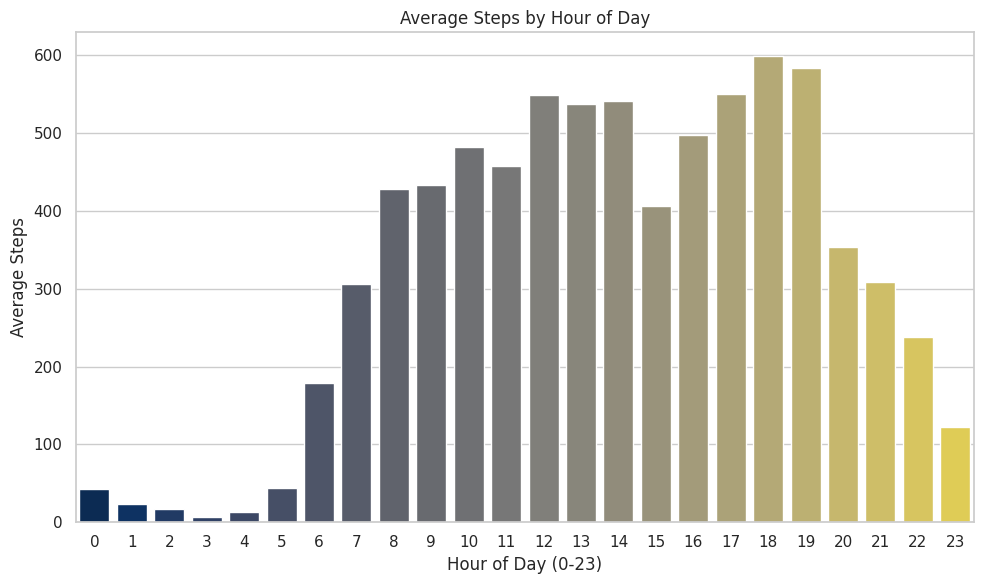

In [93]:
avg_steps_by_hour = hourly_steps.groupby('HourOfDay')['StepTotal'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_steps_by_hour, x='HourOfDay', y='StepTotal', palette='cividis')
plt.title('Average Steps by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Steps')
plt.tight_layout()
plt.show()

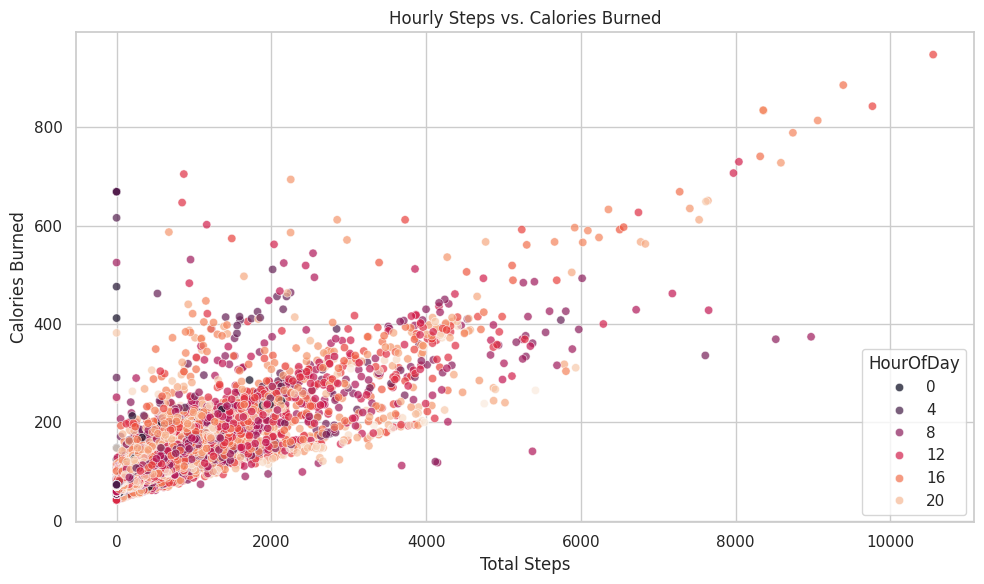

In [97]:
hourly_activity_merged = pd.merge(hourly_steps, hourly_calories, on=['Id', 'ActivityHour'], suffixes=('_steps', '_calories'))

hourly_activity_merged['HourOfDay'] = hourly_activity_merged['ActivityHour'].dt.hour

plt.figure(figsize=(10, 6))
sns.scatterplot(data=hourly_activity_merged, x='StepTotal', y='Calories', hue='HourOfDay', palette='rocket', alpha=0.7)
plt.title('Hourly Steps vs. Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.tight_layout()
plt.show()

# weight_log = pd.read_csv

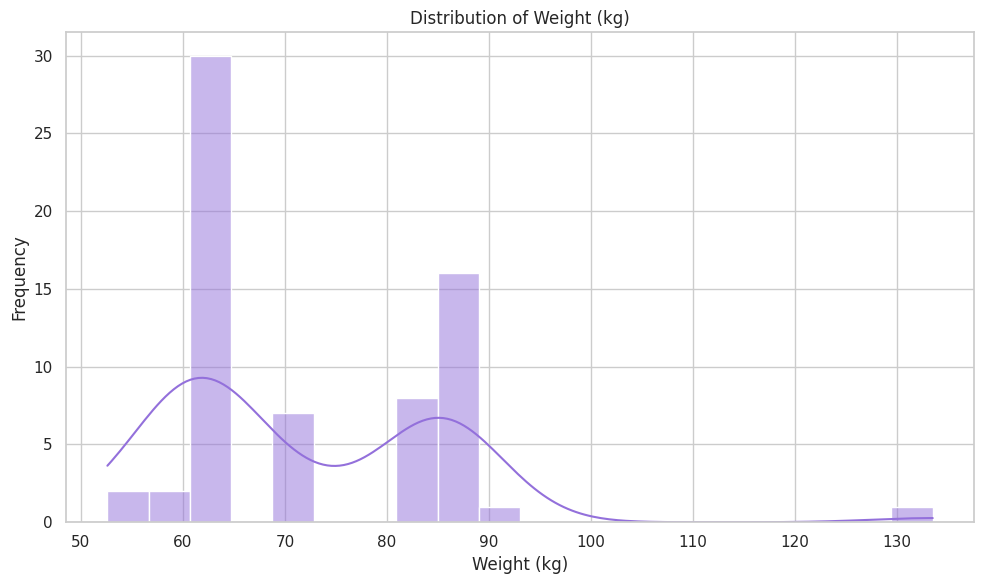

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(weight_log['WeightKg'], kde=True, bins=20, color='mediumpurple')
plt.title('Distribution of Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

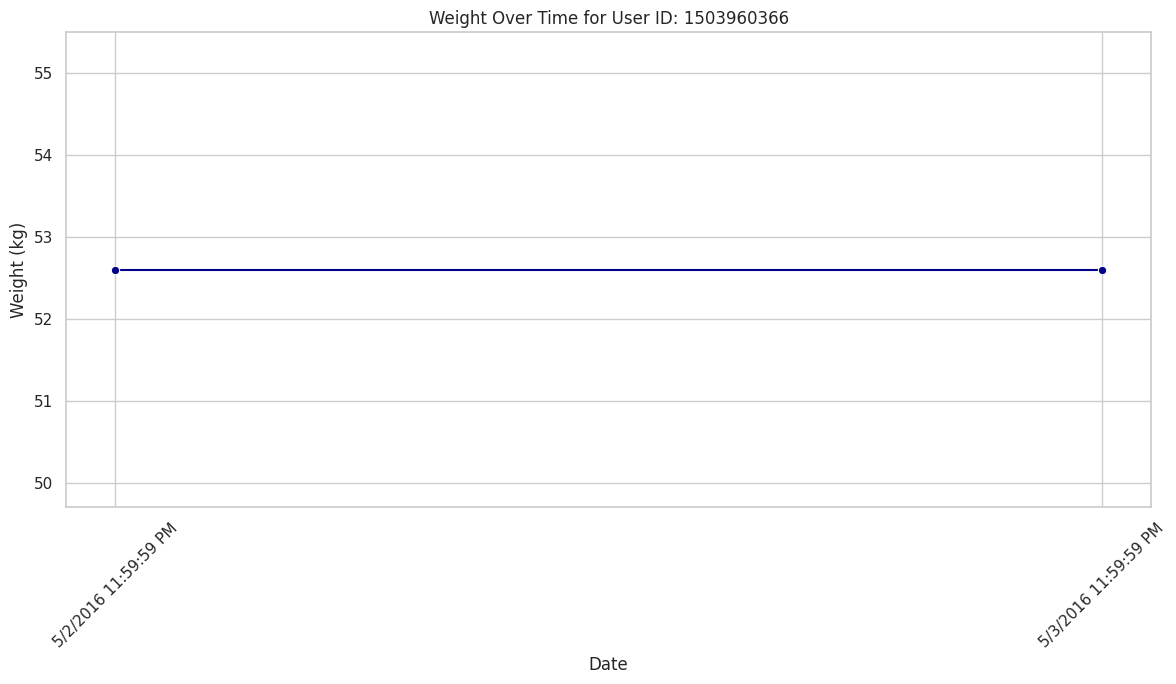

In [99]:
sample_user_id_weight = weight_log['Id'].unique()[0]
sample_weight_data = weight_log[weight_log['Id'] == sample_user_id_weight].sort_values(by='Date').copy()

plt.figure(figsize=(12, 7))
sns.lineplot(data=sample_weight_data, x='Date', y='WeightKg', marker='o', color='darkblue')
plt.title(f'Weight Over Time for User ID: {sample_user_id_weight}')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

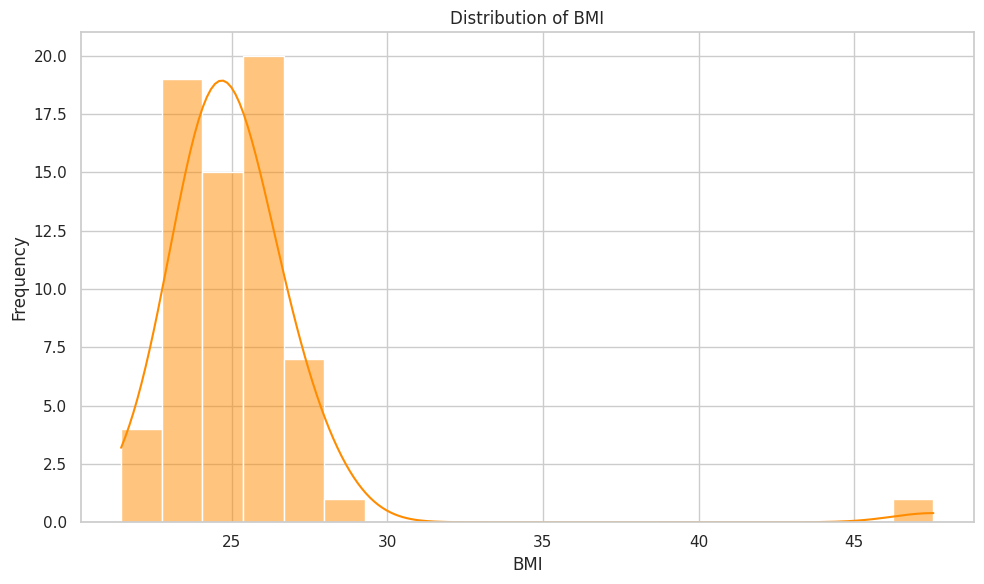

In [100]:
if 'BMI' in weight_log.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(weight_log['BMI'], kde=True, bins=20, color='darkorange')
    plt.title('Distribution of BMI')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()